To approximate the function $ f(x) = ln(x^3) $, construct the Hermite polynomial with nodes 0.2 and 0.3, each with multiplicities of 2 and 1, respectively.

Then plot the graph of the relative error in absolute value within the interpolation interval.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

$$
f(x) = ln(x^3)
$$

$$
f'(x) = \frac{1}{x^3}3x^2
$$

$$
f'(x) = \frac{3}{x}
$$

In [2]:
def f(x):
    return np.log(x ** 3)

def f_prim(x):
    return 3 / x

In [3]:
nodes = np.array([0.2, 0.2, 0.3])
values = np.array([f(0.2), f_prim(0.2), f(0.3)])

In [14]:
def get_derivative(nodes, values, left, right):
    for i in range(nodes.size):
        if nodes[i] == nodes[left]:
            return values[i + right - left]
    return None

def divided_difference_generalized(nodes, values, left, right):
    if nodes[left] == nodes[right]:
        return get_derivative(nodes, values, left, right) / math.factorial(right - left)
    else:
        return (divided_difference_generalized(nodes, values, left+1, right) + 
          -divided_difference_generalized(nodes, values, left, right-1)) / (nodes[right] - nodes[left])

def hermit_poly(nodes, values, x):
    return sum(divided_difference_generalized(nodes, values, 0, i) *
      (math.prod(x - nodes[j] for j in range(0, i))) for i in range(nodes.size))

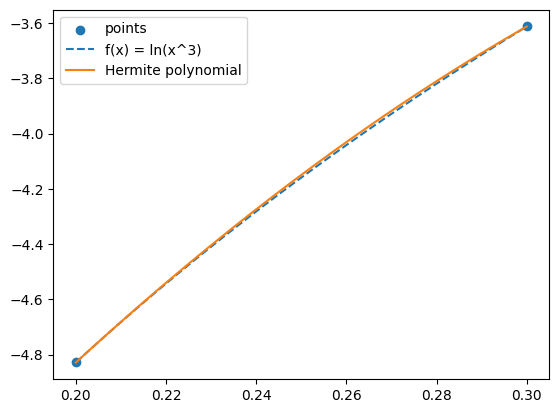

In [13]:
x_axis = np.linspace(nodes.min(), nodes.max(), 100)

plt.scatter([0.2, 0.3], [f(0.2), f(0.3)])
plt.plot(x_axis, f(x_axis), linestyle='dashed')
plt.plot(x_axis, hermit_poly(nodes, values, x_axis))
plt.legend(['points', 'f(x) = ln(x^3)', 'Hermite polynomial'])
plt.show()

In [19]:
def get_relative_error(nodes, values, x):
    return abs(f(x) - hermit_poly(nodes, values, x)) / abs(f(x))

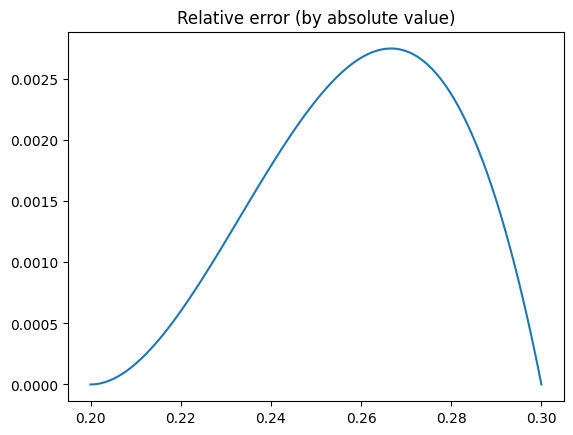

In [20]:
plt.plot(x_axis, get_relative_error(nodes, values, x_axis))
plt.title('Relative error (by absolute value)')
plt.show()